# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from Weather_API import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Python_APIs_Challenge/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

In [4]:
#Create lists
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
hum_list = []
cloudy_list = []
wind_list = []
country_list = []
date_list = []
counter = 0
sets = 1

print(f"Beginning Data Retrieval\n"  
f"-----------------------------\n")
    
#Run loop through city list
for city in cities:
    #Build partial query URL
    query_url = f"{url}q={cape town.replace(' ','+')}&appid={weather_api_key}"
    #Response from API requests
    response = requests.get(query_url).json()
    #Call and creation of list
    try:
        city_list.append(response['name'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_temp_list.append(response['main']['temp_max'])
        hum_list.append(response['main']['humidity'])
        cloudy_list.append(response['clouds']['all'])
        wind_list.append(response['wind']['speed'])
        country_list.append(response['sys']['country'])
        date_list.append(response['dt'])
        #Populate counters
        if counter>50:
            counter=0
            sets+=1
            time.sleep(2)
        else:    
            counter+=1
            print(f"Processing Record {counter} of Set {sets} | {city}")
            time.sleep(2)
    except:
        print(f"City not found. Skipping...")
        
# print(f"-----------------------------\n"
# f"Data Retrieval Complete\n"      
# f"-----------------------------\n")

Beginning Data Retrieval
-----------------------------

Processing Record 1 of Set 1 | mackay
Processing Record 2 of Set 1 | tromso
Processing Record 3 of Set 1 | mataura
City not found. Skipping...
Processing Record 4 of Set 1 | chapleau
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | chokurdakh
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | pundaguitan
Processing Record 11 of Set 1 | buala
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | cherskiy
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | okhotsk
City not found. Skipping...
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | codrington
City not found. Skipping...
Processing Record 19 of Set 1 | uttiramerur
Processing Record 20 of Set 1 | pochutla
Processing Record 21 of Set 1 | thompson
Pr

Processing Record 30 of Set 4 | bingol
Processing Record 31 of Set 4 | strunino
Processing Record 32 of Set 4 | hokitika
Processing Record 33 of Set 4 | vestmannaeyjar
Processing Record 34 of Set 4 | severo-kurilsk
Processing Record 35 of Set 4 | kununurra
Processing Record 36 of Set 4 | luderitz
Processing Record 37 of Set 4 | acarau
Processing Record 38 of Set 4 | auki
Processing Record 39 of Set 4 | bom jesus da lapa
Processing Record 40 of Set 4 | dandong
Processing Record 41 of Set 4 | mossendjo
Processing Record 42 of Set 4 | lorengau
Processing Record 43 of Set 4 | torbay
Processing Record 44 of Set 4 | dilla
Processing Record 45 of Set 4 | biak
Processing Record 46 of Set 4 | gimbi
Processing Record 47 of Set 4 | hasaki
Processing Record 48 of Set 4 | teshie
Processing Record 49 of Set 4 | linhares
Processing Record 50 of Set 4 | anadyr
Processing Record 51 of Set 4 | languyan
City not found. Skipping...
Processing Record 1 of Set 5 | leningradskiy
Processing Record 2 of Set 5 

Processing Record 15 of Set 8 | marystown
Processing Record 16 of Set 8 | kokopo
City not found. Skipping...
Processing Record 17 of Set 8 | saint-louis
Processing Record 18 of Set 8 | pingdingshan
Processing Record 19 of Set 8 | synya
Processing Record 20 of Set 8 | komatsu
Processing Record 21 of Set 8 | homer
Processing Record 22 of Set 8 | te anau
City not found. Skipping...
Processing Record 23 of Set 8 | praya
Processing Record 24 of Set 8 | yatou
City not found. Skipping...
Processing Record 25 of Set 8 | dombarovskiy
Processing Record 26 of Set 8 | honningsvag
Processing Record 27 of Set 8 | elhovo
Processing Record 28 of Set 8 | novyy buyan
Processing Record 29 of Set 8 | north adams
Processing Record 30 of Set 8 | pinega
Processing Record 31 of Set 8 | srednekolymsk
Processing Record 32 of Set 8 | the valley
Processing Record 33 of Set 8 | mocuba
Processing Record 34 of Set 8 | china
Processing Record 35 of Set 8 | mezhdurechensk
Processing Record 36 of Set 8 | sinnamary
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [68]:
# #Converting Raw data
weather_df = pd.DataFrame({
    "City": city_list,
    "Latitude": lat_list,
    "Longitude": lng_list,
    "Max_Temps": max_temp_list,
    "Humidity": hum_list,
    "Cloudiness": cloudy_list,
    "Wind_Speed": wind_list,
    "Country": country_list,
    "Date": date_list
})

weather_df

,City,Latitude,Longitude,Max_Temps,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Mackay,-21.1500,149.2000,297.62,35,4,4.12,AU,1623981388
1,Tromsø,69.6496,18.9570,282.51,93,75,0.00,NO,1623981391
2,Mataura,-46.1927,168.8643,281.19,75,7,3.24,NZ,1623981393
3,Chapleau,47.8405,-83.4034,295.20,49,75,3.09,CA,1623981396
4,Longyearbyen,78.2186,15.6401,277.06,65,75,5.66,SJ,1623981399
...,...,...,...,...,...,...,...,...,...
543,Truth or Consequences,33.1284,-107.2528,307.28,16,1,4.12,US,1623982763
544,Jiayuguan City,39.8167,98.3000,294.14,16,100,2.44,CN,1623982766
545,Itarema,-2.9248,-39.9167,299.22,83,16,5.16,BR,1623982768
546,Oriximiná,-1.7656,-55.8661,297.10,90,51,1.73,BR,1623982682


In [69]:
#Save df as CSV file
weather_df.to_csv('CityWeather.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#Generate summary statistics
weather_df.describe()

,Latitude,Longitude,Max_Temps,Humidity,Cloudiness,Wind_Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,19.907407,16.398529,293.130657,69.854015,54.627737,3.442883,1.623982e+09
std,32.462807,93.069280,8.063128,21.502873,40.119749,2.390951,4.100902e+02
min,-54.800000,-179.166700,270.930000,7.000000,0.000000,0.000000,1.623981e+09
25%,-5.321975,-65.620375,287.390000,58.750000,9.000000,1.610000,1.623982e+09
50%,22.175950,22.285000,293.955000,74.500000,62.000000,2.895000,1.623982e+09
75%,46.352950,101.891400,299.465000,86.000000,98.000000,4.630000,1.623982e+09
max,78.218600,178.416700,315.320000,100.000000,100.000000,12.160000,1.623983e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.
weather_df[weather_df['Humidity'] > 100]

,City,Latitude,Longitude,Max_Temps,Humidity,Cloudiness,Wind_Speed,Country,Date


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


No data points with > 100% Humidity.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [73]:
new_weather_df = weather_df
new_weather_df

,City,Latitude,Longitude,Max_Temps,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Mackay,-21.1500,149.2000,297.62,35,4,4.12,AU,1623981388
1,Tromsø,69.6496,18.9570,282.51,93,75,0.00,NO,1623981391
2,Mataura,-46.1927,168.8643,281.19,75,7,3.24,NZ,1623981393
3,Chapleau,47.8405,-83.4034,295.20,49,75,3.09,CA,1623981396
4,Longyearbyen,78.2186,15.6401,277.06,65,75,5.66,SJ,1623981399
...,...,...,...,...,...,...,...,...,...
543,Truth or Consequences,33.1284,-107.2528,307.28,16,1,4.12,US,1623982763
544,Jiayuguan City,39.8167,98.3000,294.14,16,100,2.44,CN,1623982766
545,Itarema,-2.9248,-39.9167,299.22,83,16,5.16,BR,1623982768
546,Oriximiná,-1.7656,-55.8661,297.10,90,51,1.73,BR,1623982682


In [93]:
#Create new Max Temps (F) column
f_temp = (new_weather_df['Max_Temps']-273.15)*(9/5)+32
new_weather_df['Max_Temps_in_Fahrenheit'] = round(f_temp,2)
new_weather_df.head()

,City,Latitude,Longitude,Max_Temps,Humidity,Cloudiness,Wind_Speed,Country,Date,Max_Temps_in_Fahrenheit,Imperial_Wind_Speed
0,Mackay,-21.1500,149.2000,297.62,35,4,4.12,AU,1623981388,76.05,9.23
1,Tromsø,69.6496,18.9570,282.51,93,75,0.00,NO,1623981391,48.85,0.00
2,Mataura,-46.1927,168.8643,281.19,75,7,3.24,NZ,1623981393,46.47,7.26
3,Chapleau,47.8405,-83.4034,295.20,49,75,3.09,CA,1623981396,71.69,6.92
4,Longyearbyen,78.2186,15.6401,277.06,65,75,5.66,SJ,1623981399,39.04,12.68


In [94]:
#Create new Wind Speed (imperial) column
i_wind_speed = new_weather_df['Wind_Speed']*2.24
new_weather_df['Imperial_Wind_Speed'] = round(i_wind_speed,2)
new_weather_df.head()

,City,Latitude,Longitude,Max_Temps,Humidity,Cloudiness,Wind_Speed,Country,Date,Max_Temps_in_Fahrenheit,Imperial_Wind_Speed
0,Mackay,-21.1500,149.2000,297.62,35,4,4.12,AU,1623981388,76.05,9.23
1,Tromsø,69.6496,18.9570,282.51,93,75,0.00,NO,1623981391,48.85,0.00
2,Mataura,-46.1927,168.8643,281.19,75,7,3.24,NZ,1623981393,46.47,7.26
3,Chapleau,47.8405,-83.4034,295.20,49,75,3.09,CA,1623981396,71.69,6.92
4,Longyearbyen,78.2186,15.6401,277.06,65,75,5.66,SJ,1623981399,39.04,12.68


In [28]:
#Import dependencies
from datetime import date
from datetime import time
from datetime import datetime

In [35]:
#Date conversion (reference: https://www.kite.com/python/
#answers/how-to-convert-between-utc-and-local-time-in-python)
UTC_date = weather_df['Date'][0]
date_converted = date.fromtimestamp(UTC_datetime)
print(date_converted)

2021-06-17


## Latitude vs. Temperature Plot

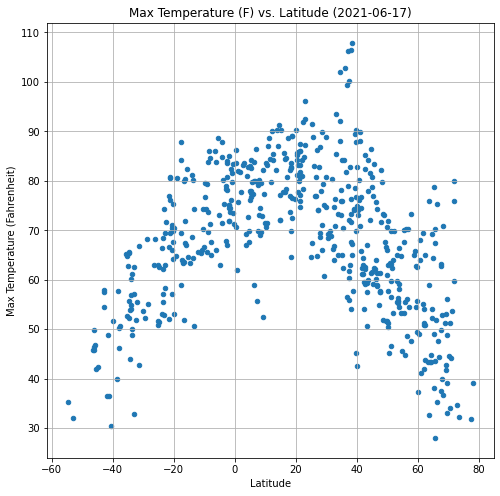

<Figure size 432x288 with 0 Axes>

In [97]:
new_weather_df.plot(kind='scatter', x='Latitude', y='Max_Temps_in_Fahrenheit', grid=True, 
                figsize=(8,8), title= f'Max Temperature (F) vs. Latitude ({date_converted})',
                xlabel='Latitude', ylabel='Max Temperature (Fahrenheit)')
plt.show()
plt.savefig("MaxTemps_vs_Latitude")

With the Latitude vs. Temperature plot, I find that cities with the highest 'Max Temperatures' have a latitude between 0 and 40.

## Latitude vs. Humidity Plot

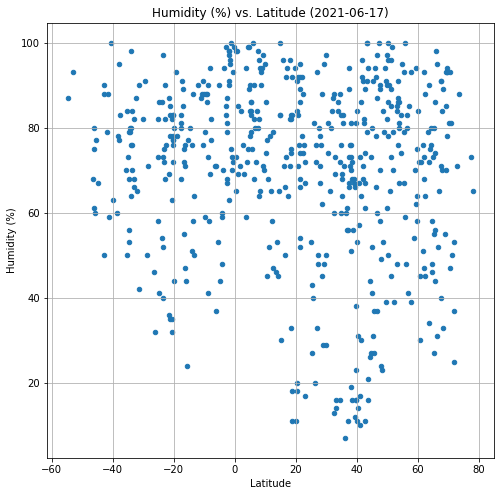

<Figure size 432x288 with 0 Axes>

In [89]:
new_weather_df.plot(kind='scatter', x='Latitude', y='Humidity', grid=True, 
                figsize=(8,8), title= f'Humidity (%) vs. Latitude ({date_converted})',
                xlabel='Latitude', ylabel='Humidity (%)')
plt.show()
plt.savefig("Humidity_vs_Latitude")

According to the Latitude vs. Humidity plot, it appears that cities farther away from to the equator have a wider range of humidity. Therefore, cities closer to the equator tend to be more humid.

## Latitude vs. Cloudiness Plot

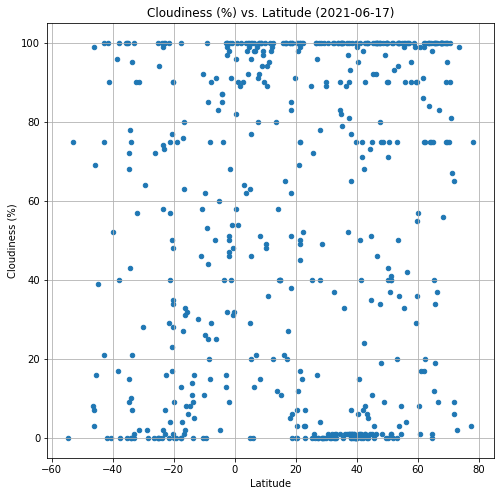

<Figure size 432x288 with 0 Axes>

In [90]:
new_weather_df.plot(kind='scatter', x='Latitude', y='Cloudiness', grid=True, 
                figsize=(8,8), title= f'Cloudiness (%) vs. Latitude ({date_converted})',
                xlabel='Latitude', ylabel='Cloudiness (%)')
plt.show()
plt.savefig("Cloudiness_vs_Latitude")

In [ ]:
According to the Latitude vs. Cloudiness plot, it appears that cities tend to have
a higher probability of either being 0% or 100%.

## Latitude vs. Wind Speed Plot

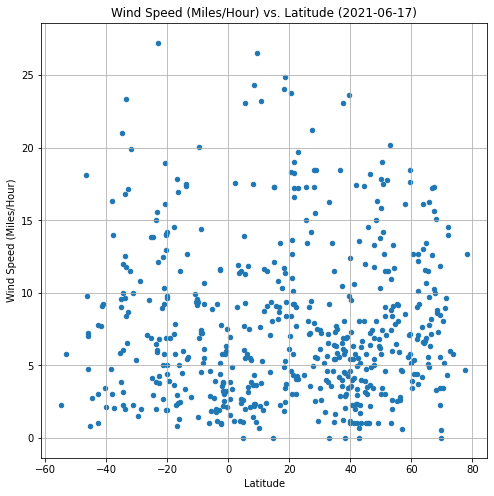

<Figure size 432x288 with 0 Axes>

In [96]:
new_weather_df.plot(kind='scatter', x='Latitude', y='Imperial_Wind_Speed', grid=True, 
                figsize=(8,8), title= f'Wind Speed (Miles/Hour) vs. Latitude ({date_converted})',
                xlabel='Latitude', ylabel='Wind Speed (Miles/Hour)')
plt.show()
plt.savefig("WindSpeed_vs_Latitude")

In [ ]:
According to the Latitude vs. Wind Speed plot,  majority of cities experience wind speeds
below 10 Mphs. As Latitude increases top wind speeds decrease.

## Linear Regression

In [104]:
#Creation of df containing cities in Northern Hemisphere
n_hemi_df = weather_df[weather_df['Latitude'] > 0]
n_hemi_df.head()

,City,Latitude,Longitude,Max_Temps,Humidity,Cloudiness,Wind_Speed,Country,Date,Max_Temps_in_Fahrenheit,Imperial_Wind_Speed
1,Tromsø,69.6496,18.9570,282.51,93,75,0.00,NO,1623981391,48.85,0.00
3,Chapleau,47.8405,-83.4034,295.20,49,75,3.09,CA,1623981396,71.69,6.92
4,Longyearbyen,78.2186,15.6401,277.06,65,75,5.66,SJ,1623981399,39.04,12.68
5,Chokurdakh,70.6333,147.9167,283.86,47,100,2.30,RU,1623981401,51.28,5.15
6,George Town,5.4112,100.3354,302.11,83,20,0.89,MY,1623981110,84.13,1.99


In [106]:
#Creation of df containing cities in Southern Hemisphere
s_hemi_df = weather_df[weather_df['Latitude'] < 0]
s_hemi_df.head()

,City,Latitude,Longitude,Max_Temps,Humidity,Cloudiness,Wind_Speed,Country,Date,Max_Temps_in_Fahrenheit,Imperial_Wind_Speed
0,Mackay,-21.1500,149.2000,297.62,35,4,4.12,AU,1623981388,76.05,9.23
2,Mataura,-46.1927,168.8643,281.19,75,7,3.24,NZ,1623981393,46.47,7.26
8,Avarua,-21.2078,-159.7750,300.18,78,75,4.63,CK,1623981408,80.65,10.37
10,Buala,-8.1450,159.5921,302.41,69,15,4.77,SB,1623981413,84.67,10.68
14,New Norfolk,-42.7826,147.0587,287.36,88,100,0.45,AU,1623981424,57.58,1.01


In [114]:
#Import dependencies
from scipy.stats import linregress
from sklearn import datasets
import scipy.stats as st

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.42
The correlation between mouse weight and the average tumor volume is, -0.65


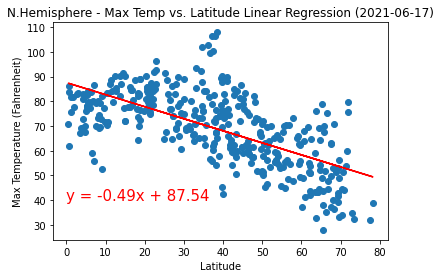

<Figure size 432x288 with 0 Axes>

In [172]:
# Print out the r-squared value along with the plot.
x_values = n_hemi_df['Latitude']
y_values = n_hemi_df['Max_Temps_in_Fahrenheit']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Fahrenheit)')
plt.title(f'N.Hemisphere - Max Temp vs. Latitude Linear Regression ({date_converted})')
print(f"The r-squared is: {round(rvalue**2,2)}")
print(f'The correlation between mouse weight and the average tumor volume is, {round(correlation[0],2)}')
plt.show()
plt.savefig("NHemi_MaxTemp_vs_Latitude_LRegression")

According the r-squared generated, 42% of the variation found in 'Max Temps' of cities in the N. Hemisphere, can be explained by 'Latitiude'. As for correlation (-.65), there appears to be a fairly strong inverse relationship between 'Latitude' and 'Max Temps' in the N. Hemisphere, during this time of the year.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.62
The correlation between mouse weight and the average tumor volume is, 0.79


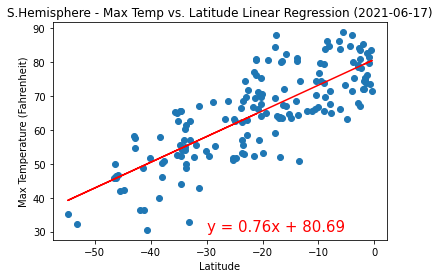

<Figure size 432x288 with 0 Axes>

In [173]:
# Print out the r-squared value along with the plot.
x_values = s_hemi_df['Latitude']
y_values = s_hemi_df['Max_Temps_in_Fahrenheit']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Fahrenheit)')
plt.title(f'S.Hemisphere - Max Temp vs. Latitude Linear Regression ({date_converted})')
print(f"The r-squared is: {round(rvalue**2,2)}")
print(f'The correlation between mouse weight and the average tumor volume is, {round(correlation[0],2)}')
plt.show()
plt.savefig("SHemi_MaxTemp_vs_Lat_LReg")

According the r-squared generated, 62% of the variation found in 'Max Temps' of cities in the S. Hemisphere can be explained by 'Latitiude'. As for correlation (.79), there appears to be a
fairly strong positive relationship between 'Latitude' and 'Max Temps' in the S. Hemisphere,
during this time of the year.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01
The correlation between mouse weight and the average tumor volume is, -0.09


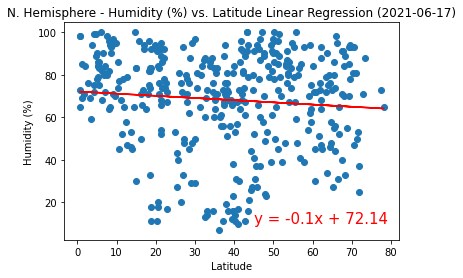

<Figure size 432x288 with 0 Axes>

In [174]:
# Print out the r-squared value along with the plot.
x_values = n_hemi_df['Latitude']
y_values = n_hemi_df['Humidity']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'N. Hemisphere - Humidity (%) vs. Latitude Linear Regression ({date_converted})')
print(f"The r-squared is: {round(rvalue**2,2)}")
print(f'The correlation between mouse weight and the average tumor volume is, {round(correlation[0],2)}')
plt.show()
plt.savefig("NHemi_Humidity_vs_Lat_LReg")

According the r-squared generated, .01% of the variation found in 'Humidity' of cities in the N. Hemisphere, can be explained by 'Latitiude'. As for correlation (-.09), there appears to be
a slight (very weak) inverse relationship between 'Latitude' and 'Humidity' in the 
N. Hemisphere,during this time of the year.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01
The correlation between mouse weight and the average tumor volume is,0.09


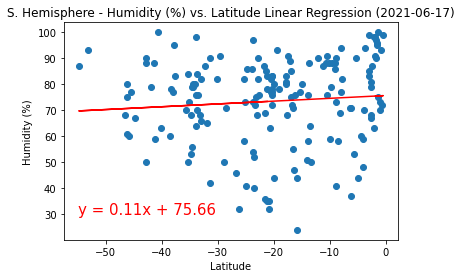

<Figure size 432x288 with 0 Axes>

In [177]:
# Print out the r-squared value along with the plot.
x_values = s_hemi_df['Latitude']
y_values = s_hemi_df['Humidity']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'S. Hemisphere - Humidity (%) vs. Latitude Linear Regression ({date_converted})')
print(f"The r-squared is: {round(rvalue**2,2)}")
print(f'The correlation between mouse weight and the average tumor volume is,{round(correlation[0],2)}')
plt.show()
plt.savefig("SHemi_Humidity_vs_Lat_LReg")

According the r-squared generated, .01% of the variation found in the'Humidity' of cities in the S. Hemisphere, can be explained by 'Latitiude'. As for correlation (.09), there appears to be a slight (very weak) positive relationship between 'Latitude' and 'Humidity' in the 
S. Hemisphere, during this time of the year.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0
The correlation between mouse weight and the average tumor volume is, 0.0


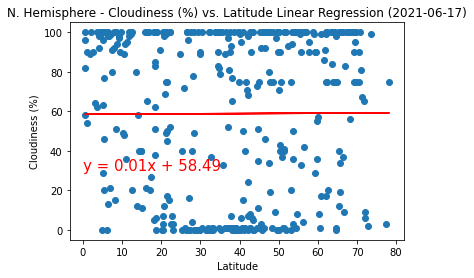

<Figure size 432x288 with 0 Axes>

In [178]:
# Print out the r-squared value along with the plot.
x_values = n_hemi_df['Latitude']
y_values = n_hemi_df['Cloudiness']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'N. Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({date_converted})')
print(f"The r-squared is: {round(rvalue**2,2)}")
print(f'The correlation between mouse weight and the average tumor volume is, {round(correlation[0],2)}')
plt.show()
plt.savefig("NHemi_Cloudiness_vs_Lat_LReg")

According the r-squared generated, .0% of the variation found in 'Cloudiness' of cities in 
the N. Hemisphere, can be explained by 'Latitiude'. As for correlation (-.00), there appears to be no relationship between 'Latitude' and 'Cloudiness' in the N. Hemisphere, during this time of the year.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01
The correlation between mouse weight and the average tumor volume is, 0.09


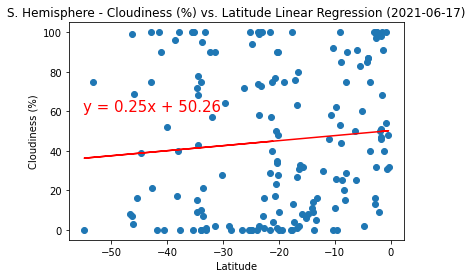

<Figure size 432x288 with 0 Axes>

In [179]:
# Print out the r-squared value along with the plot.
x_values = s_hemi_df['Latitude']
y_values = s_hemi_df['Cloudiness']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'S. Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({date_converted})')
print(f"The r-squared is: {round(rvalue**2,2)}")
print(f'The correlation between mouse weight and the average tumor volume is, {round(correlation[0],2)}')
plt.show()
plt.savefig("SHemi_Cloudiness_vs_Lat_LReg")

According the r-squared generated, .01% of the variation found in 'Cloudiness' of cities in 
the S. Hemisphere, can be explained by 'Latitiude'. As for correlation (.09), there appears to be a slight (very weak) positive relationship between 'Latitude' and 'Cloudiness' in the S. Hemisphere, during this time of the year.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0
The correlation between mouse weight and the average tumor volume is, 0.01


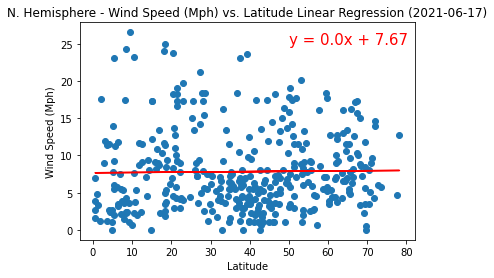

<Figure size 432x288 with 0 Axes>

In [180]:
# Print out the r-squared value along with the plot.
x_values = n_hemi_df['Latitude']
y_values = n_hemi_df['Imperial_Wind_Speed']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (Mph)')
plt.title(f'N. Hemisphere - Wind Speed (Mph) vs. Latitude Linear Regression ({date_converted})')
print(f"The r-squared is: {round(rvalue**2,2)}")
print(f'The correlation between mouse weight and the average tumor volume is, {round(correlation[0],2)}')
plt.show()
plt.savefig("NHemi_WS_vs_Lat_LReg")

According the r-squared generated, .0% of the variation found in 'Wind Speed' of cities in 
the N. Hemisphere, can be explained by 'Latitiude'. As for correlation (.01), there appears to be a slight (very weak) positive relationship between 'Latitude' and 'Wind Speed' in the N. Hemisphere, during this time of the year.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03
The correlation between mouse weight and the average tumor volume is, -0.17


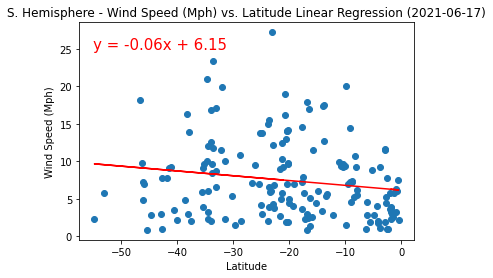

<Figure size 432x288 with 0 Axes>

In [181]:
# Print out the r-squared value along with the plot.
x_values = s_hemi_df['Latitude']
y_values = s_hemi_df['Imperial_Wind_Speed']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (Mph)')
plt.title(f'S. Hemisphere - Wind Speed (Mph) vs. Latitude Linear Regression ({date_converted})')
print(f"The r-squared is: {round(rvalue**2,2)}")
print(f'The correlation between mouse weight and the average tumor volume is, {round(correlation[0],2)}')
plt.show()
plt.savefig("SHemi_WS_vs_Lat_LReg")

According the r-squared generated, .03% of the variation found in 'Wind Speed' of cities in 
the S. Hemisphere, can be explained by 'Latitiude'. As for correlation (.01), there appears to be a slight (very weak) inverse relationship between 'Latitude' and 'Wind Speed' in the S. Hemisphere, during this time of the year.